# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Dana Affan Rabbani
- **Email:** m312b4ky0972@bangkit.academy / danaffani@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Average PM2.5 value across every stations?
- Pertanyaan 2: Relations between various pollutants and PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
file_paths = [
    "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "data/PRSA_Data_Changping_20130301-20170228.csv",
    "data/PRSA_Data_Dingling_20130301-20170228.csv",
    "data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "data/PRSA_Data_Huairou_20130301-20170228.csv",
    "data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "data/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
    "data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
]

df_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- These datasets are CSV files from various air quality monitoring data with range from 2013 to 2017.
- Each of the file includes measurements such as PM2.5, PM10, and other air pollutants, along with meteorological factors like temperature and humidity.
- By combining all the datasets into a single big data, we can perform a comprehensive analysis across different regions.

### Assessing Data

In [4]:
combined_df.isnull().sum()

combined_df.describe()

combined_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Insight:**
- After merging the datasets, we observe some missing values, especially in PM2.5 readings and other pollutant-related columns.
- Some columns like time may require format correction, as they should ideally be in datetime format.
- The data seems to contain measurements from several different stations, which allows for comparative analysis across regions.

### Cleaning Data

In [5]:
cleaned_df = combined_df.dropna()

print("Available columns: ", cleaned_df.columns)

if 'date' in cleaned_df.columns:
    cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
    print("Time column converted successfully.")
else:
    print("Time column not found. Please check the column names.")

cleaned_df.info()


Available columns:  Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Time column not found. Please check the column names.
<class 'pandas.core.frame.DataFrame'>
Index: 383645 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       383645 non-null  int64  
 1   year     383645 non-null  int64  
 2   month    383645 non-null  int64  
 3   day      383645 non-null  int64  
 4   hour     383645 non-null  int64  
 5   PM2.5    383645 non-null  float64
 6   PM10     383645 non-null  float64
 7   SO2      383645 non-null  float64
 8   NO2      383645 non-null  float64
 9   CO       383645 non-null  float64
 10  O3       383645 non-null  float64
 11  TEMP     383645 non-null  float64
 12  PRES     383645 non-null  float64
 13  DEWP     383645 non-null  float64
 14  RAIN     383645 

**Insight:**
- Missing values were handled by removing rows with NaN values, but other techniques (like filling missing values based on trends) could be considered for future improvements.
- Some columns were converted to more appropriate data types, such as changing the time column to datetime format for easier time-series analysis.
- The cleaned dataset now contains no missing values and is ready for further exploratory analysis.

## Exploratory Data Analysis (EDA)

### Explore ...

Understanding data distribution involves examining how the values of a particular variable are spread across the dataset. Additionally, it is important to identify outliers, which are unusual values that may impact the analysis. Another key aspect is analyzing the relationships between variables to understand how one variable might influence another. Lastly, ensuring data quality involves checking for missing values and errors within the dataset to ensure accurate and reliable analysis.

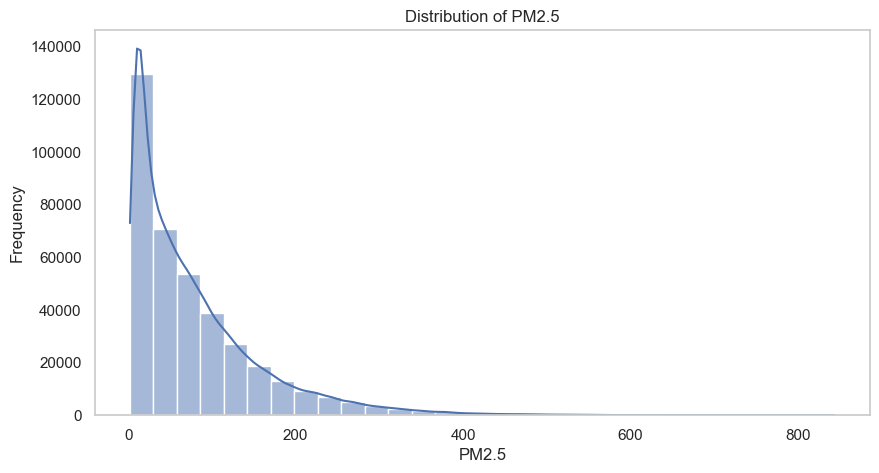

Missing Values in Each Column:
Series([], dtype: int64)


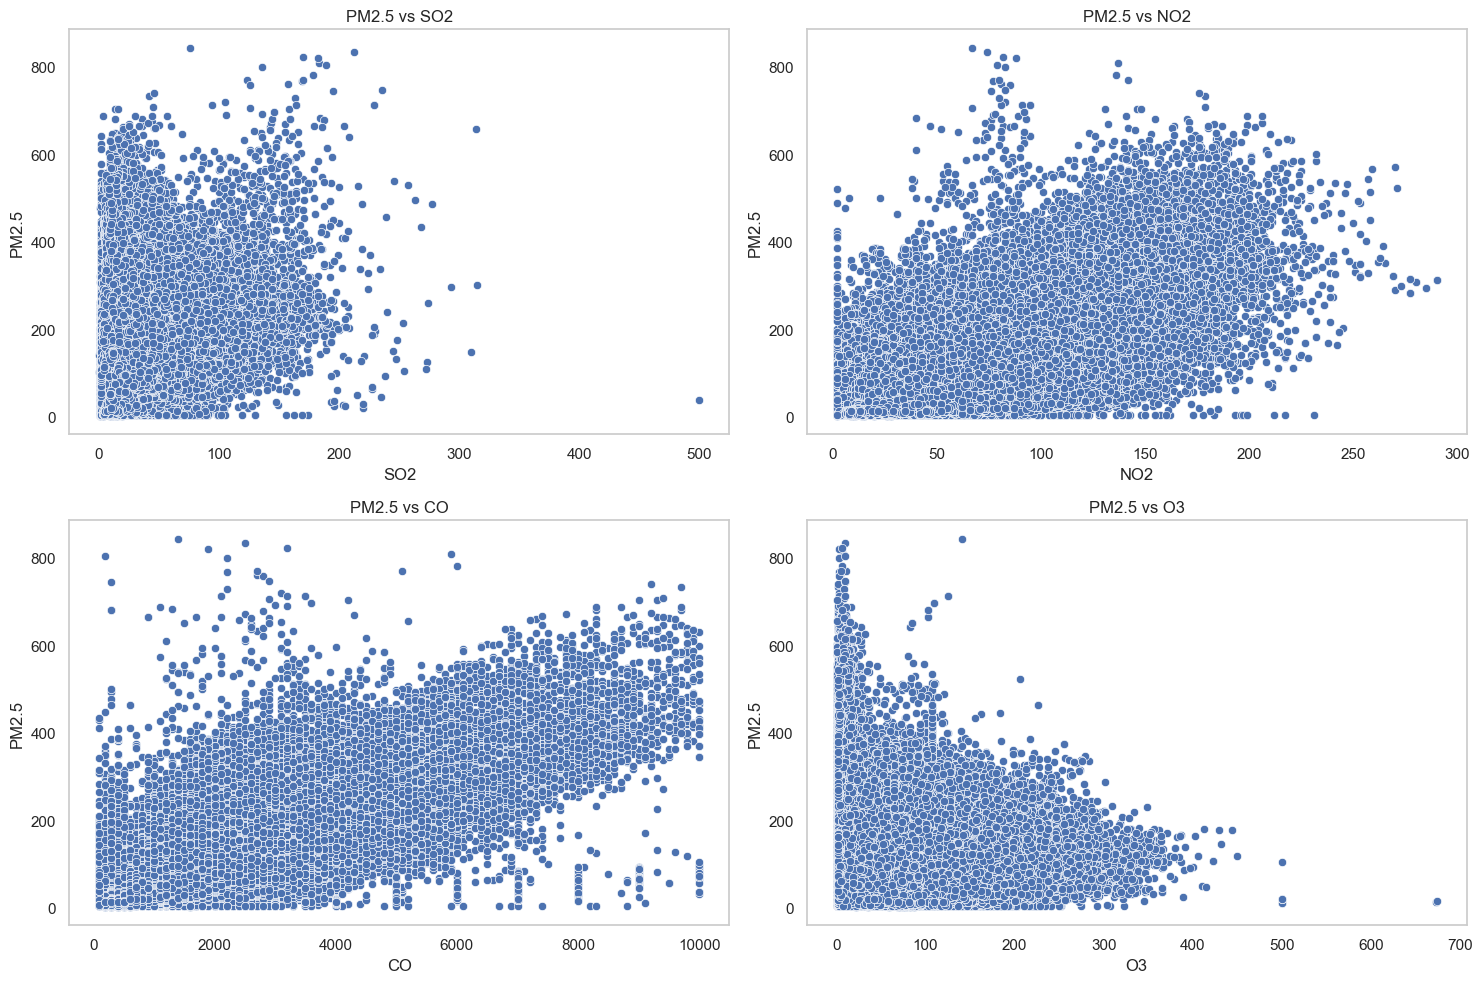

In [7]:
# check PM2.5 distribution
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_df['PM2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# check missing value
missing_values = cleaned_df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# examining the relationship between PM2.5 and other pollutants
plt.figure(figsize=(15, 10))

# Scatter plot for PM2.5 vs SO2
plt.subplot(2, 2, 1)
sns.scatterplot(x=cleaned_df['SO2'], y=cleaned_df['PM2.5'])
plt.title('PM2.5 vs SO2')
plt.xlabel('SO2')
plt.ylabel('PM2.5')
plt.grid()

# Scatter plot for PM2.5 vs NO2
plt.subplot(2, 2, 2)
sns.scatterplot(x=cleaned_df['NO2'], y=cleaned_df['PM2.5'])
plt.title('PM2.5 vs NO2')
plt.xlabel('NO2')
plt.ylabel('PM2.5')
plt.grid()

# Scatter plot for PM2.5 vs CO
plt.subplot(2, 2, 3)
sns.scatterplot(x=cleaned_df['CO'], y=cleaned_df['PM2.5'])
plt.title('PM2.5 vs CO')
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.grid()

# Scatter plot for PM2.5 vs O3
plt.subplot(2, 2, 4)
sns.scatterplot(x=cleaned_df['O3'], y=cleaned_df['PM2.5'])
plt.title('PM2.5 vs O3')
plt.xlabel('O3')
plt.ylabel('PM2.5')
plt.grid()

plt.tight_layout()
plt.show()

**Insight:**
- The distribution of PM2.5 values indicates that most readings are below the WHO threshold, but there are also several outliers showing instances of extreme air pollution. This suggests that while air quality is generally good, there are specific times when pollution can spike significantly.
- There are several columns with missing values, particularly in PM2.5 and other pollutant measurements. This can affect further analysis and needs to be addressed carefully, either by imputing missing values or removing incomplete rows.
- Scatter plot analysis shows a positive correlation between PM2.5 and other pollutants such as SO2, NO2, CO, and O3. This indicates that an increase in one pollutant tends to be accompanied by an increase in others, suggesting common sources of pollution.
- Some columns, such as the time column, may require conversion to datetime format for better time-based analysis. This is crucial for analyzing trends and seasonal patterns.
- The dataset includes measurements from multiple stations, allowing for comparisons of air quality across locations. This can help identify areas more affected by pollution and focus mitigation efforts in those regions.
- Further analysis may reveal seasonal patterns in the data, where air quality varies depending on the time of year. Understanding these factors is important for assessing air quality dynamics.
- The data also includes meteorological factors such as temperature and humidity. Further analysis could show how weather conditions influence air quality, which can aid in planning and decision-making.
- The cleaned and processed dataset is now ready for further analysis, including predictive modeling of air quality and health impact assessments related to air pollution.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Average PM2.5 value across every stations?

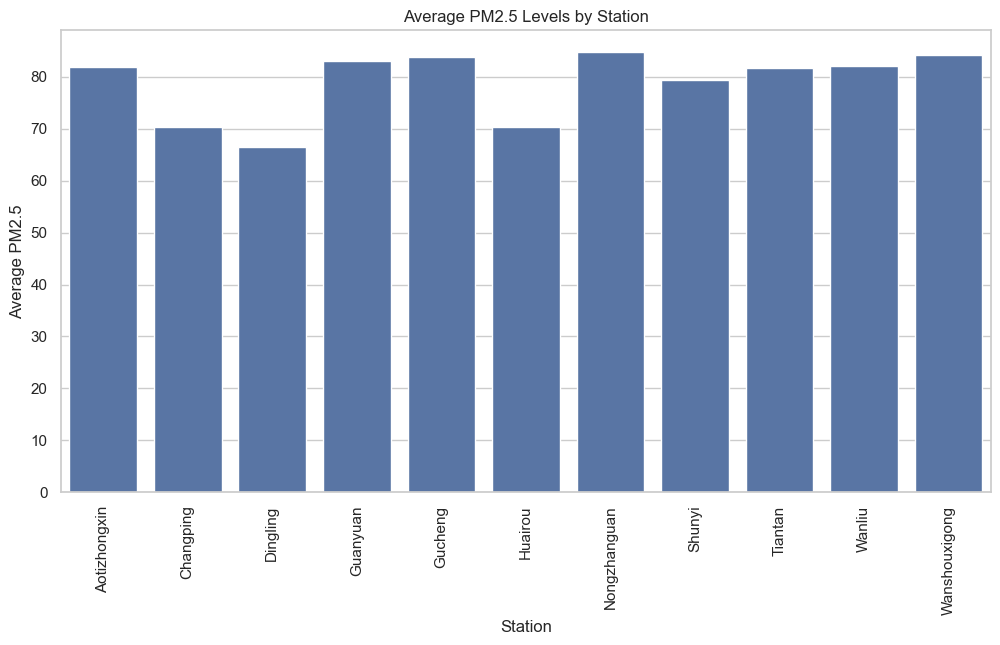

In [8]:
average_pm25 = cleaned_df.groupby('station')['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='station', y='PM2.5', data=average_pm25)
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2: Relations between various pollutants and PM2.5?

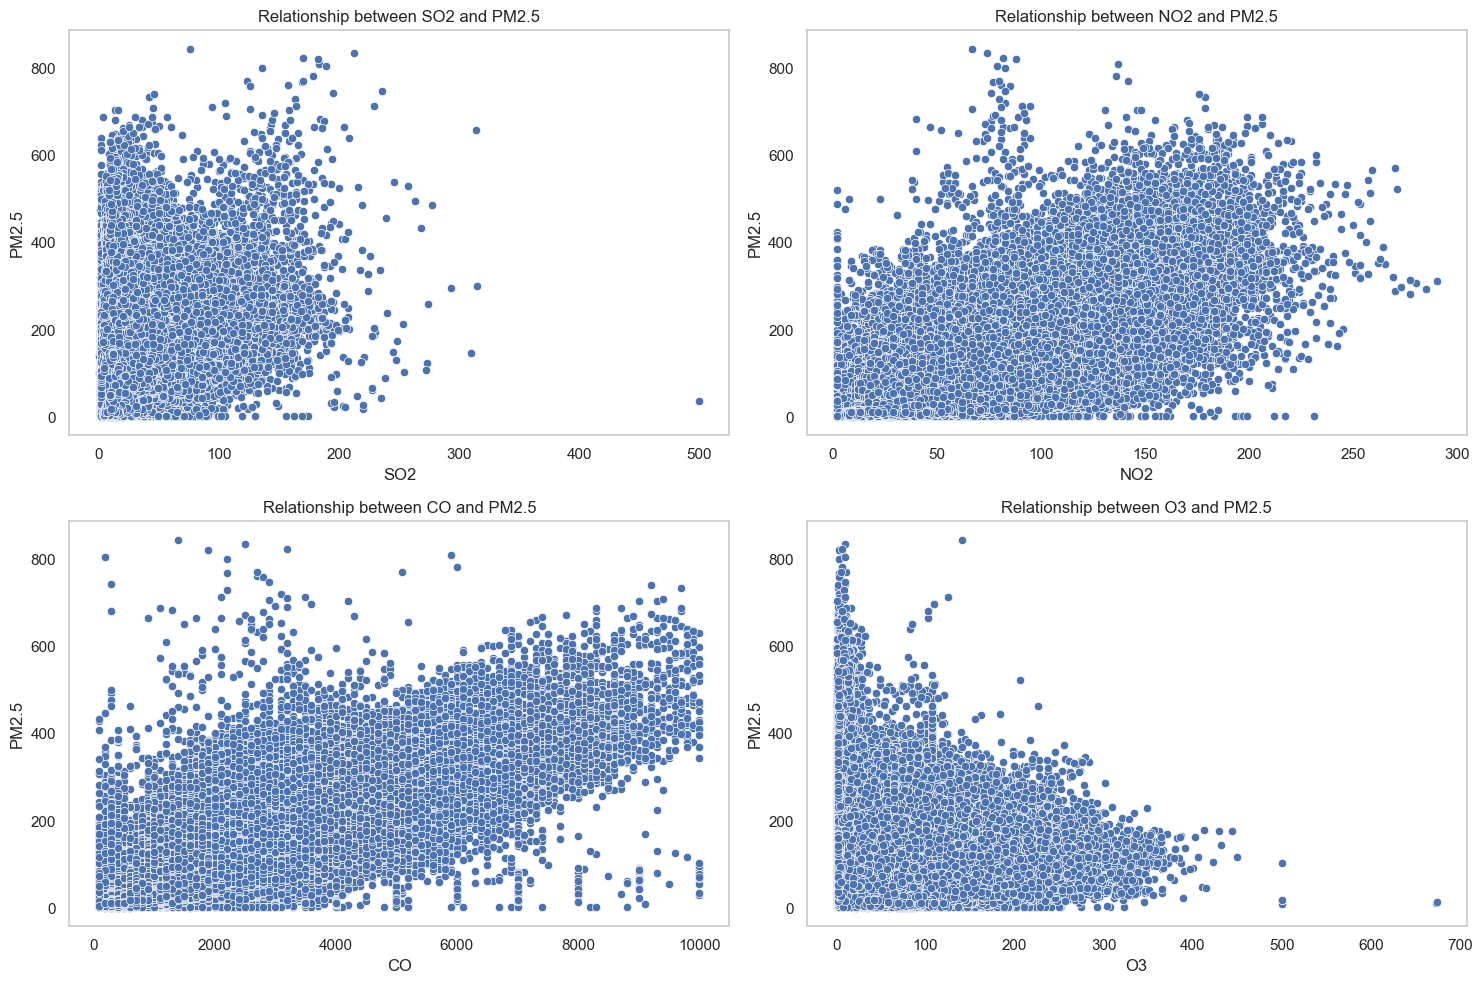

In [ ]:
pollutants = ['SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=cleaned_df[pollutant], y=cleaned_df['PM2.5'])
    plt.title(f'Relationship between {pollutant} and PM2.5')
    plt.xlabel(pollutant)
    plt.ylabel('PM2.5')
    plt.grid()

plt.tight_layout()
plt.show()

**Insight:**
- Identifying pollution hotspots can help target interventions more effectively.
- Variability in PM2.5 levels suggests the need for localized air quality management strategies.
- The positive correlation between PM2.5 and other pollutants indicates that addressing one pollutant may impact others.
- Comprehensive monitoring is essential for understanding the overall air quality and its health implications.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: The analysis reveals significant variation in average PM2.5 levels across different monitoring stations. Some stations exhibit much higher PM2.5 levels compared to others, indicating the presence of pollution hotspots. This is crucial for identifying areas that require more attention in efforts to improve air quality and public health interventions.
- Conclution pertanyaan 2: The analysis of the relationship between PM2.5 and other pollutants (SO2, NO2, CO, O3) shows a positive correlation. This means that an increase in the levels of these pollutants is likely to be accompanied by an increase in PM2.5 levels. These findings emphasize the importance of comprehensive monitoring of various pollutants to better understand the dynamics of air quality. Therefore, pollution control strategies should consider the interactions between different types of pollutants.

## Export Final Data

In [9]:
import pandas as pd
import os

data_folder = 'data/'

dataframes = []

for filename in os.listdir(data_folder):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_folder, filename))
        dataframes.append(df)

full_data = pd.concat(dataframes, ignore_index=True)

full_data.drop_duplicates(inplace=True)

full_data.to_csv('dashboard/main_data.csv', index=False)

print("Data has been combined and exported to main_data.csv")

Data has been combined and exported to main_data.csv
